# First Part - Data Preparation

In this part we are going to clear up the data set, merge some Excel Sheets and prepare the input for the Clustering Algorithms. This will be done to both the 'Baskets' dataset and to the one regarding the 'Customers'.

In [177]:
import pandas as pd
import numpy as np

## Clearing up the data for the Baskets

In [179]:
df = pd.read_excel(r"POS DATA_BAPT.xlsx",  sheet_name='POS DATA')

### Duplicates
This dataset may contain duplicate values. In order to prevent that from happening, we drop the potential duplicates.

In [180]:
# Sort dataframe
df.sort_values(['Barcode', 'Basket_ID', 'Date'], inplace = True)

# Remove duplicates
df.drop_duplicates()


,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID
221455,1095946999,2013-03-23,2017977,8,1.680000,NaN
226206,1107361546,2013-04-27,2087203,1,3.100015,9.163002e+12
206505,1105405895,2013-04-22,2089378,1,0.640000,9.162004e+12
206516,1105406109,2013-04-22,2089378,1,0.709993,NaN
206507,1105431898,2013-04-22,2089378,2,1.420015,9.164014e+12
206509,1106160992,2013-04-24,2089378,2,1.420015,NaN
206514,1106168475,2013-04-24,2089378,1,0.709993,NaN
206504,1106189349,2013-04-24,2089378,1,0.709993,9.164002e+12
206506,1106511261,2013-04-25,2089378,2,1.280000,9.163002e+12
206508,1106915875,2013-04-26,2089378,1,0.709993,NaN


### Returns
In a dataset like this one, there may be some negative values. But, those negative numbers in the 'Sum_Values' may occur from the exact same Basket_ID, the exact same Barcode and the exact same Date. In that case, there are some returns of products in the dataset. Those corresponding positive values need to be dropped as well, even though in this case we didn't have any.

In [182]:
#Check if dataframe contains any returns
    
return_ids = (df[df['Sum_Units'] < 0 ]).index
return_data = df.loc[return_ids][['Basket_ID', 'Date', 'Barcode', 'Sum_Units','Sum_Value']]
    
x = df[['Basket_ID']].isin(return_data['Basket_ID'])
    
if x.sum().tolist()[0] == len(return_ids.tolist()):
    print("DataFrame has no returns")
else:
    print("DataFrame contains returns")
        

DataFrame has no returns


In [183]:
# Remove all purchases with negative sum values
df.drop(df[df['Sum_Value'] < 0].index, inplace = True) 


### Outliers
In the case of outliers, we usually need to remove all baskets containing a number of items that is an outlier. But, we need to see if the Total Value of those baskets is going to hinder the Super Market. The outliers can be found from the plots below. 

In [184]:
# Create pivot table with the total amount of items purchased by each basket
by_basket = df.pivot_table(index = 'Basket_ID',
                            values = 'Sum_Units',
                            aggfunc = 'sum')

In [187]:
# Remove all baskets that contain only one item
basket_1 = by_basket[by_basket['Sum_Units'] == 1]
basket_index = basket_1.index.tolist()
df = df[~df['Basket_ID'].isin(basket_index)]


In [188]:
# Create pivot table with the total amount of spent by each basket
by_basket1 = df.pivot_table(index = 'Basket_ID',
                            values = 'Sum_Value',
                            aggfunc = 'sum')


In [189]:
# Merge the two pivot tables

by_basket = pd.merge(by_basket, 
               by_basket1[['Sum_Value']], 
               on= by_basket.index, 
               how='inner')

# Sort pivot table by Sum_Units
by_basket.sort_values(by = 'Sum_Units', ascending = False, inplace = True)


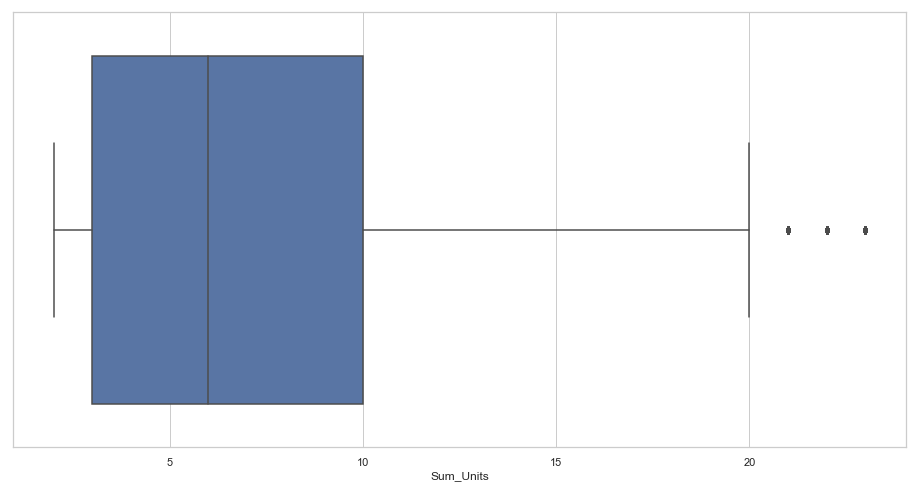

In [190]:
# Visual representation of the outliers

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style = "whitegrid")
plt.figure(figsize = (16,8))
ax = sns.boxplot(x = by_basket['Sum_Units'])



In [191]:
# Table with baskets containing more than 20 items
basket_20 = by_basket[by_basket['Sum_Units'] > 19]

# Calculate the total value that will be lost if we omit the outliers (the baskets with more than 20 items)
by_basket_20 = basket_20.pivot_table(index = 'Sum_Units',
                            values = 'Sum_Value',
                            aggfunc = 'sum')

loss = by_basket_20.sum(axis = 0)
loss

Sum_Value    44962.595853
dtype: float64

In case we remove the baskets containing more than 20 items, the total loss for the Business will be approximately 45.062 euros. So, we decided to keep those in the dataset still.

## Clearing up the data for the Customers

In [193]:
df_loy = pd.read_excel(r"C:\Users\Pigi\Desktop\POS DATA_BAPT.xlsx",  sheet_name='LOYALTY')

### Missing Values
In the Loyalty Card dataset, there are a lot of lines that are missing 3 or more values. Those customers will serve no use for the clustering of the data, so we decided to remove them.

In [194]:
#Remove all the single rows with 3 or more missing values 
list1 = []
for i in range(len(df_loy.index)) :
    if (df_loy.iloc[i].isna().sum() > 2):
        list1.append(i)

df_loy.drop(list1 , inplace = True )


### Outliers
In this case, we decided to remove some customers based on their 'Age' and 'HouseholdSize'. We calculated the frequencies and we removed the Customers whose ages and household sizes were on the bottom end of the frequencies tables.

In [195]:
# Find age frequency from Cardholders' data
age_freq = df_loy.groupby('Age').size()
age_freq.sort_values(ascending =False, inplace = True)

age_list = []
for i in age_freq.index:
    age_list.append(age_freq.loc[i])

indexes = age_freq.index

df_ages = pd.DataFrame({'Age': indexes, 'Frequencies': age_list})
df_ages.set_index('Age')
df_ages

,Age,Frequencies
0,44.0,3172
1,45.0,3133
2,41.0,3112
3,46.0,3101
4,42.0,3076
5,43.0,3044
6,47.0,3007
7,39.0,3003
8,48.0,2920
9,40.0,2909


In [199]:
# Remove ages with frequency lower than 101 (They are around 87-93 or 19 and younger)

df_ages_101 = df_ages[df_ages['Frequencies'] < 102]
ages_list_101 = df_ages_101['Age'].tolist()
df_loy = df_loy[~df_loy['Age'].isin(ages_list_101)]


In [ ]:
# Explore the values for the variable 'HouseholdSize'
df_loy.HouseholdSize.value_counts()
house_freq = df_loy.groupby('HouseholdSize').size()
house_freq.sort_values(ascending =False, inplace = True)

house_list = []
for i in house_freq.index:
    house_list.append(house_freq.loc[i])

indexes = house_freq.index
house_list

df_house = pd.DataFrame({'HouseholdSize': indexes, 'Frequencies': house_list})
df_house.set_index('HouseholdSize')


In [ ]:
# Remove the values with frequency lower than 81

df_house_80 = df_house[df_house['Frequencies'] < 81]
house_list_80 = df_house_80['HouseholdSize'].tolist()
df_loy = df_loy[~df_loy['HouseholdSize'].isin(house_list_80)]

### Random Sex values
There were some values for the variable 'Sex' that didn't make sense and would not offer much information for our Analysis. Those values were removed.

In [200]:
# Explore the values for the variable 'Sex'
df_loy.Sex.value_counts()

Female    93777
Male      67412
Name: Sex, dtype: int64

In [201]:
# Remove 'Fake Names', 'Unknown' & 'Company'
df_loy.drop(df_loy[df_loy['Sex'].isin(['Fake Names', 'Company','Unknown'])].index, inplace = True) 


In [205]:
# Barcodes sheet
df_bar = pd.read_excel(r"C:\Users\Pigi\Desktop\POS DATA_BAPT.xlsx",  sheet_name='BARCODES')

In [206]:
# Categories hierarchy sheet
df_cat = pd.read_excel(r"C:\Users\Pigi\Desktop\POS DATA_BAPT.xlsx",  sheet_name='Categories Hierarchy')

In [207]:
#Create concat values for 'Categories Hierarchy' & 'BARCODES'
df_cat['Concat Value'] = df_cat['CategoryA'].map(str) + df_cat['Category B'].map(str) + df_cat['Category C'].map(str) + df_cat['Category D'].map(str)
df_bar['Concat Value'] = df_bar['CategoryA'].map(str) + df_bar['CategoryB'].map(str) + df_bar['CategoryC'].map(str) + df_bar['CategoryD'].map(str)


In [209]:
#Merge 'BARCODES' with 'Categories Hierarchy' 
df_bar = pd.merge(df_bar, 
               df_cat[['Concat Value', 'Product B','Product C', 'Product D']], 
               on='Concat Value', 
               how='inner')

In [210]:
df_bar.head(20)

,Barcode,CategoryA,CategoryB,CategoryC,CategoryD,Concat Value,Product B,Product C,Product D
0,360923242189,60,60,767,2,60607672,ΠΑΠΟΥΤΣΙΑ,ΠΑΠΟΥΤΣΙΑ ΑΓΟΡΙ,ΠΑΝΙΝΑ ΑΓΟΡΙ
1,360923242188,60,60,767,2,60607672,ΠΑΠΟΥΤΣΙΑ,ΠΑΠΟΥΤΣΙΑ ΑΓΟΡΙ,ΠΑΝΙΝΑ ΑΓΟΡΙ
2,360923242183,60,60,767,2,60607672,ΠΑΠΟΥΤΣΙΑ,ΠΑΠΟΥΤΣΙΑ ΑΓΟΡΙ,ΠΑΝΙΝΑ ΑΓΟΡΙ
3,360923242197,60,60,767,2,60607672,ΠΑΠΟΥΤΣΙΑ,ΠΑΠΟΥΤΣΙΑ ΑΓΟΡΙ,ΠΑΝΙΝΑ ΑΓΟΡΙ
4,360923242192,60,60,767,2,60607672,ΠΑΠΟΥΤΣΙΑ,ΠΑΠΟΥΤΣΙΑ ΑΓΟΡΙ,ΠΑΝΙΝΑ ΑΓΟΡΙ
5,360923242191,60,60,767,2,60607672,ΠΑΠΟΥΤΣΙΑ,ΠΑΠΟΥΤΣΙΑ ΑΓΟΡΙ,ΠΑΝΙΝΑ ΑΓΟΡΙ
6,360923242185,60,60,767,2,60607672,ΠΑΠΟΥΤΣΙΑ,ΠΑΠΟΥΤΣΙΑ ΑΓΟΡΙ,ΠΑΝΙΝΑ ΑΓΟΡΙ
7,360923242187,60,60,767,2,60607672,ΠΑΠΟΥΤΣΙΑ,ΠΑΠΟΥΤΣΙΑ ΑΓΟΡΙ,ΠΑΝΙΝΑ ΑΓΟΡΙ
8,360923242182,60,60,767,2,60607672,ΠΑΠΟΥΤΣΙΑ,ΠΑΠΟΥΤΣΙΑ ΑΓΟΡΙ,ΠΑΝΙΝΑ ΑΓΟΡΙ
9,360923242196,60,60,767,2,60607672,ΠΑΠΟΥΤΣΙΑ,ΠΑΠΟΥΤΣΙΑ ΑΓΟΡΙ,ΠΑΝΙΝΑ ΑΓΟΡΙ


In [211]:
df = pd.merge(df, 
               df_bar[['Barcode', 'Product B', 'Product C', 'Product D']], 
               on='Barcode', 
               how='inner')

In [212]:
df.head(20)

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD,Product B,Product C,Product D
0,1095946999,2013-03-23,2017977,8,1.680000,NaN,10,11,266,1,ΠΟΤΑ,ΚΡΑΣΙΑ,ΛΕΥΚΟ
1,1107361546,2013-04-27,2087203,1,3.100015,9.163002e+12,20,54,164,2,ΑΡΤΟΠΟΙΕΙΟ,ΚΡΟΥΑΣΑΝΤΕΡΙ,ΤΣΟΥΡΕΚΙΑ
2,1105405895,2013-04-22,2089378,1,0.640000,9.162004e+12,20,54,161,1,ΑΡΤΟΠΟΙΕΙΟ,ΨΩΜΙ ΚΑΝΟΝΙΚΟ,ΛΕΥΚΟ ΠΟΛΥΤΕΛΕΙΑΣ
3,1105406109,2013-04-22,2089378,1,0.709993,NaN,20,54,161,1,ΑΡΤΟΠΟΙΕΙΟ,ΨΩΜΙ ΚΑΝΟΝΙΚΟ,ΛΕΥΚΟ ΠΟΛΥΤΕΛΕΙΑΣ
4,1105431898,2013-04-22,2089378,2,1.420015,9.164014e+12,20,54,161,1,ΑΡΤΟΠΟΙΕΙΟ,ΨΩΜΙ ΚΑΝΟΝΙΚΟ,ΛΕΥΚΟ ΠΟΛΥΤΕΛΕΙΑΣ
5,1106160992,2013-04-24,2089378,2,1.420015,NaN,20,54,161,1,ΑΡΤΟΠΟΙΕΙΟ,ΨΩΜΙ ΚΑΝΟΝΙΚΟ,ΛΕΥΚΟ ΠΟΛΥΤΕΛΕΙΑΣ
6,1106168475,2013-04-24,2089378,1,0.709993,NaN,20,54,161,1,ΑΡΤΟΠΟΙΕΙΟ,ΨΩΜΙ ΚΑΝΟΝΙΚΟ,ΛΕΥΚΟ ΠΟΛΥΤΕΛΕΙΑΣ
7,1106189349,2013-04-24,2089378,1,0.709993,9.164002e+12,20,54,161,1,ΑΡΤΟΠΟΙΕΙΟ,ΨΩΜΙ ΚΑΝΟΝΙΚΟ,ΛΕΥΚΟ ΠΟΛΥΤΕΛΕΙΑΣ
8,1106511261,2013-04-25,2089378,2,1.280000,9.163002e+12,20,54,161,1,ΑΡΤΟΠΟΙΕΙΟ,ΨΩΜΙ ΚΑΝΟΝΙΚΟ,ΛΕΥΚΟ ΠΟΛΥΤΕΛΕΙΑΣ
9,1106915875,2013-04-26,2089378,1,0.709993,NaN,20,54,161,1,ΑΡΤΟΠΟΙΕΙΟ,ΨΩΜΙ ΚΑΝΟΝΙΚΟ,ΛΕΥΚΟ ΠΟΛΥΤΕΛΕΙΑΣ


In [214]:
#Merge 'BARCODES' with 'LOYALTY' 
df = pd.merge(df, 
               df_loy[['Card_ID', 'Age','Sex', 'MaritalStatus','HouseholdSize','Children']], 
               on='Card_ID', 
               how='inner')

## Restructuring the data
Here we are renaming some categories and we are including everything that will be used later for the Clustering Analysis in the column named 'Category C'. Those changes were made based on pure speculation.

In [221]:
df.loc[df['Product C'] == 'ΨΩΜΙ ΣΠΕΣΙΑΛ ΣΥΣΚΕΥΑΣΜΕΝΑ', 'Product C'] = 'ΑΡΤΟΣΚΕΥΑΣΜΑΤΑ'

In [222]:
df.loc[df['Product C'] == 'ΕΡΓΑΣΤΗΡΙΑΚΗ ΖΑΧΑΡΟΠ/ΤΙΚΗ', 'Product C'] = 'ΠΡΟΙΟΝΤΑ ΓΙΑ ΖΑΧΑΡΟΠ/ΤΙΚΗ'
df.loc[df['Product C'] == 'ΖΑΧΑΡΗ', 'Product C'] = 'ΠΡΟΙΟΝΤΑ ΓΙΑ ΖΑΧΑΡΟΠ/ΤΙΚΗ'

In [223]:
df.loc[df['Product C'] == 'ΣΟΚΟΛΑΤΕΣ', 'Product C'] = 'ΓΛΥΚΑ/ΣΝΑΚΣ'
df.loc[df['Product C'] == 'ΣΟΚΟΛΑΤΟΕΙΔΗ', 'Product C'] = 'ΓΛΥΚΑ/ΣΝΑΚΣ'
df.loc[df['Product C'] == 'ΜΠΙΣΚΟΤΑ ΓΛΥΚΑ', 'Product C'] = 'ΓΛΥΚΑ/ΣΝΑΚΣ'
df.loc[df['Product C'] == 'ΖΑΧΑΡΩΔΗ', 'Product C'] = 'ΓΛΥΚΑ/ΣΝΑΚΣ'

In [224]:
df.loc[df['Product C'] == 'ΚΑΦΕΣ ΚΑΒΟΥΡΔΙΣΜΕΝΟΣ', 'Product C'] = 'ΚΑΦΕΣ/ΤΣΑΙ/ΡΟΦΗΜΑΤΑ'
df.loc[df['Product C'] == 'ΣΤΙΓΜΙΑΙΟΣ ΚΑΦΕΣ', 'Product C'] = 'ΚΑΦΕΣ/ΤΣΑΙ/ΡΟΦΗΜΑΤΑ'
df.loc[df['Product C'] == 'ΚΑΚΑΟ - ΡΟΦΗΜΑΤΑ', 'Product C'] = 'ΚΑΦΕΣ/ΤΣΑΙ/ΡΟΦΗΜΑΤΑ'
df.loc[df['Product C'] == 'ΤΣΑΙ ΑΦΕΨΗΜΑΤΑ', 'Product C'] = 'ΚΑΦΕΣ/ΤΣΑΙ/ΡΟΦΗΜΑΤΑ'

In [225]:
df.loc[df['Product C'] == 'ΕΤΟΙΜΑ ΦΑΓΗΤΑ', 'Product C'] = 'ΚΟΝΣΕΡΒΕΣ'
df.loc[df['Product C'] == 'ΚΟΜΠΟΣΤΕΣ', 'Product C'] = 'ΚΟΝΣΕΡΒΕΣ'
df.loc[df['Product C'] == 'ΚΟΝΣΕΡΒΕΣ ΛΑΧΑΝΙΚΩΝ', 'Product C'] = 'ΚΟΝΣΕΡΒΕΣ'
df.loc[df['Product C'] == 'ΚΟΝΣΕΡΒΕΣ ΨΑΡΙΚΩΝ', 'Product C'] = 'ΚΟΝΣΕΡΒΕΣ'
df.loc[df['Product C'] == 'ΚΟΝΣΕΡΒΕΣ ΚΡΕΑΤΟΣ', 'Product C'] = 'ΚΟΝΣΕΡΒΕΣ'

In [226]:
df.loc[(df['Product B'].isin(['ΦΡΕΣΚΑ ΠΕΡΙΟΡΙΣΜ ΔΙΑΡΚΕΙΑ'])) & (df['Product C'].isin(['ΓΙΑΟΥΡΤΙ'])), 'Product B'] = 'ΓΑΛΑΚΤΟΚΟΜΙΚΑ'
df.loc[(df['Product B'].isin(['ΦΡΕΣΚΑ ΠΕΡΙΟΡΙΣΜ ΔΙΑΡΚΕΙΑ'])) & (df['Product C'].isin(['ΓΑΛΑ ΦΡΕΣΚΟ'])), 'Product B'] = 'ΓΑΛΑΚΤΟΚΟΜΙΚΑ'

In [227]:
df.loc[df['Product C'] == 'ΤΥΠΟΠΟΙΗΜΕΝΑ ΤΥΡΙΑ', 'Product C'] = 'ΤΥΡΙΑ ΣΥΣΚΕΥΑΣΜΕΝΑ'

df.loc[df['Product C'] == 'ΒΟΥΤΥΡΑ', 'Product C'] = 'ΒΟΥΤΥΡΑ/ΜΑΡΓΑΡΙΝΕΣ'
df.loc[df['Product C'] == 'ΜΑΡΓΑΡΙΝΕΣ', 'Product C'] = 'ΒΟΥΤΥΡΑ/ΜΑΡΓΑΡΙΝΕΣ'

df.loc[df['Product C'] == 'ΔΙΑΦΟΡΑ ΓΑΛΑΚΤΟΚΟΜΙΚ ΚΟΥΠ', 'Product C'] = 'ΔΙΑΦΟΡΑ ΓΑΛΑΚΤΟΚΟΜΙΚΑ'
df.loc[df['Product C'] == 'ΔΙΑΦΟΡΑ ΓΑΛΑΚΤΟΚΟΜ ΣΥΣΚΕΥ', 'Product C'] = 'ΔΙΑΦΟΡΑ ΓΑΛΑΚΤΟΚΟΜΙΚΑ'
df.loc[df['Product C'] == 'ΠΡΟΙΟΝ ΓΑΛΑΚ ΜΑΚΡΑΣ ΔΙΑΡΚ', 'Product C'] = 'ΓΑΛΑΤΑ ΜΑΚΡΑΣ ΔΙΑΡΚΕΙΑΣ'

In [228]:
df.loc[(df['Product B'].isin(['ΑΛΛΑΝΤΙΚΑ / ΕΤΟΙΜΑ ΦΑΓΗΤΑ'])) & (df['Product C'].isin(['ΑΛΛΑΝΤΙΚΑ ΚΟΥΠ'])), 'Product B'] = 'ΑΛΛΑΝΤΙΚΑ'

df.loc[df['Product C'] == 'ΚΑΤΕΡΓΑΣΜΕΝΑ ΒΡΑΣΤΑ & ΩΜΑ', 'Product C'] = 'ΚΟΤΟΠΟΥΛΑ'

df.loc[(df['Product B'].isin(['ΠΟΥΛΕΡΙΚΑ ΝΩΠΑ'])) & (df['Product C'].isin(['ΚΟΤΟΠΟΥΛΑ'])), 'Product B'] = 'ΚΡΕΟΠΩΛΕΙΟ'
df.loc[df['Product B'] == 'ΠΑΡΑΔΟΣΙΑΚΟ ΚΡΕΟΠΩΛΕΙΟ', 'Product B'] = 'ΚΡΕΟΠΩΛΕΙΟ'


In [229]:
df.loc[df['Product C'] == 'ΣΥΝΤΗΡΗΣΗ', 'Product C'] = 'ΚΑΘΑΡΙΣΜΟΣ ΣΠΙΤΙΟΥ'

df.loc[df['Product C'] == 'ΚΑΦΕ - ΠΡΟΓΕΥΜΑ', 'Product C'] = 'ΣΚΕΥΗ/ΠΙΑΤΙΚΑ'
df.loc[df['Product C'] == 'ΓΥΑΛΙΚΑ', 'Product C'] = 'ΣΚΕΥΗ/ΠΙΑΤΙΚΑ'
df.loc[df['Product C'] == 'ΠΙΑΤΙΚΑ', 'Product C'] = 'ΣΚΕΥΗ/ΠΙΑΤΙΚΑ'
df.loc[df['Product C'] == 'ΜΑΧ/ΡΟΥΝΑ-ΠΙΑΤΕΛ ΑΝΟΞΕΙΔ', 'Product C'] = 'ΣΚΕΥΗ/ΠΙΑΤΙΚΑ'
df.loc[df['Product C'] == 'ΜΑΓΕΙΡΙΚΑ ΣΚΕΥΗ ΚΟΥΖΙΝΑΣ', 'Product C'] = 'ΣΚΕΥΗ/ΠΙΑΤΙΚΑ'
df.loc[df['Product C'] == 'ΠΡΟΕΤΟΙΜ ΤΡΑΠΕΖ & ΜΑΓΕΙΡ', 'Product C'] = 'ΣΚΕΥΗ/ΠΙΑΤΙΚΑ'
df.loc[df['Product C'] == 'ΠΡΟΕΤΟΙΜ ΤΡΑΠΕΖ & ΜΑΓΕΙΡ', 'Product C'] = 'ΣΚΕΥΗ/ΠΙΑΤΙΚΑ'

In [230]:
df.loc[df['Product C'] == 'ΕΙΔΗ ΝΟΙΚΟΚΥΡΙΟΥ', 'Product C'] = 'ΕΙΔΗ ΜΙΑΣ ΧΡΗΣΕΩΣ'

df.loc[df['Product C'] == 'ΧΑΡΤΙΚΑ / ΤΕΤΡΑΔΙΑ', 'Product C'] = 'ΓΡΑΦΙΚΗ ΥΛΗ'
df.loc[df['Product C'] == 'ΧΑΡΤΙΚΑ ΓΡΑΦΕΙΟΥ', 'Product C'] = 'ΓΡΑΦΙΚΗ ΥΛΗ'
df.loc[df['Product C'] == 'ΧΑΡΤΙΚΑ ΣΧΕΔΙΟΥ', 'Product C'] = 'ΓΡΑΦΙΚΗ ΥΛΗ'
df.loc[df['Product C'] == 'ΣΧΟΛΙΚΑ ΕΙΔΗ', 'Product C'] = 'ΓΡΑΦΙΚΗ ΥΛΗ'

In [231]:
df.loc[df['Product C'] == 'ΑΞΕΣΟΥΑΡ ΠΑΡΟΥΣΙΑΣΗΣ DECO', 'Product C'] = 'ΕΙΔΗ ΚΗΠΟΥ'
df.loc[df['Product C'] == 'ΕΞΟΠΛΙΣΜΟΣ ΚΗΠΟΥ', 'Product C'] = 'ΕΙΔΗ ΚΗΠΟΥ'
df.loc[df['Product C'] == 'ΠΟΤΙΣΜΑ / ΨΕΚΑΣΜΑ', 'Product C'] = 'ΕΙΔΗ ΚΗΠΟΥ'
df.loc[df['Product C'] == 'ΛΙΠΑΣΜΑΤΑ / ΒΕΛΤΙΩΤΙΚΑ', 'Product C'] = 'ΕΙΔΗ ΚΗΠΟΥ'

In [232]:
df.loc[(df['Product B'].isin(['ΤΑΚΤΟΠΟΙΗΣΗ ΣΠΙΤΙΟΥ'])) & (df['Product C'].isin(['ΥΓΙΕΙΝΗΣ'])), 'Product B'] = 'ΕΙΔΗ ΣΠΙΤΙΟΥ'
df.loc[(df['Product B'].isin(['ΛΕΥΚΑ ΕΙΔΗ'])) & (df['Product C'].isin(['ΛΕΥΚΑ ΕΙΔΗ'])), 'Product B'] = 'ΕΙΔΗ ΣΠΙΤΙΟΥ'

In [233]:
df.loc[(df['Product B'].isin(['ΠΑΝΤΟΠΩΛΕΙΟ ΤΡΟΦΙΜΑ'])) & (df['Product C'].isin(['ΠΑΙΔΙΚΕΣ ΤΡΟΦΕΣ'])), 'Product B'] = 'ΒΡΕΦΙΚΑ 0-18Μ'

df.loc[df['Product C'] == 'ΨΑΡΙΑ,ΘΑΛΑΣΣΙΝΑ,ΣΑΛΙΓΚΑΡΙ', 'Product C'] = 'ΨΑΡΙΑ/ΘΑΛΑΣΣΙΝΑ/ΣΑΛΙΓΚΑΡΙ ΚΑΤΕΨ'

df.loc[(df['Product B'].isin(['ΚΑΤΕΨΥΓΜΕΝΑ'])) & (df['Product C'].isin(['ΨΑΡΙΑ/ΘΑΛΑΣΣΙΝΑ/ΣΑΛΙΓΚΑΡΙ ΚΑΤΕΨ'])), 'Product B'] = 'ΠΑΡΑΔΟΣΙΑΚΟ ΨΑΡΑΔΙΚΟ'
df.loc[(df['Product B'].isin(['ΑΛΛΑΝΤΙΚΑ / ΕΤΟΙΜΑ ΦΑΓΗΤΑ'])) & (df['Product C'].isin(['ΘΑΛΑΣΣΙΝΑ'])), 'Product B'] = 'ΠΑΡΑΔΟΣΙΑΚΟ ΨΑΡΑΔΙΚΟ'

In [234]:
df.loc[df['Product C'] == '4η ΓΚΑΜΑ', 'Product C'] = 'ΕΤΟΙΜΑ ΦΡΟΥΤΑ/ΛΑΧΑΝΙΚΑ'
df.loc[df['Product C'] == '5η ΓΚΑΜΑ', 'Product C'] = 'ΕΤΟΙΜΑ ΦΡΟΥΤΑ/ΛΑΧΑΝΙΚΑ'
df.loc[df['Product C'] == 'ΤΟΥΡΣΙΑ ΦΡΟΥΤΑ/ΛΑΧΑΝΙΚΑ', 'Product C'] = 'ΕΤΟΙΜΑ ΦΡΟΥΤΑ/ΛΑΧΑΝΙΚΑ'
df.loc[df['Product C'] == 'ΣΑΛΑΤΕΣ ΤΟΥΡΣΙΑ', 'Product C'] = 'ΕΤΟΙΜΑ ΦΡΟΥΤΑ/ΛΑΧΑΝΙΚΑ'


In [235]:
df.loc[(df['Product B'].isin(['ΑΛΛΑΝΤΙΚΑ / ΕΤΟΙΜΑ ΦΑΓΗΤΑ'])) & (df['Product C'].isin(['ΣΑΛΑΤΕΣ ΤΟΥΡΣΙΑ'])), 'Product B'] = 'ΦΡΟΥΤΑ & ΛΑΧΑΝΙΚΑ'

df.loc[df['Product C'] == 'ΛΑΔΙ', 'Product C'] = 'ΛΑΔΙ & ΞΥΔΙ'
df.loc[df['Product C'] == 'ΞΥΔΙ', 'Product C'] = 'ΛΑΔΙ & ΞΥΔΙ'

In [236]:
df.loc[df['Product B'] == 'ΑΝΔΡΙΚΑ', 'Product B'] = 'ΕΝΔΥΣΗ/ΥΠΟΔΗΣΗ'
df.loc[df['Product B'] == 'ΠΑΠΟΥΤΣΙΑ', 'Product B'] = 'ΕΝΔΥΣΗ/ΥΠΟΔΗΣΗ'
df.loc[df['Product B'] == 'ΣΥΝΕΧΟΥΣ ΡΟΗΣ', 'Product B'] = 'ΕΝΔΥΣΗ/ΥΠΟΔΗΣΗ'


df.loc[df['Product C'] == 'ΤΖΗΝ', 'Product C'] = 'ΑΝΔΡΙΚΑ ΡΟΥΧΑ'
df.loc[df['Product C'] == 'ΠΑΝΤΕΛΟΝΙΑ', 'Product C'] = 'ΑΝΔΡΙΚΑ ΡΟΥΧΑ'

df.loc[df['Product C'] == 'ΠΑΠΟΥΤΣΙΑ ΚΟΡΙΤΣΙ 28-30', 'Product C'] = 'ΠΑΠΟΥΤΣΙΑ ΓΥΝΑΙΚΕΙΑ'
df.loc[df['Product C'] == 'ΠΑΠΟΥΤΣΙΑ ΓΥΝΑΙΚΕΙΑ 35-42', 'Product C'] = 'ΠΑΠΟΥΤΣΙΑ ΓΥΝΑΙΚΕΙΑ'
df.loc[df['Product C'] == 'ΑΘΛΗΤΙΚΑ ΓΥΝΑΙΚΕΙΑ 36-41', 'Product C'] = 'ΠΑΠΟΥΤΣΙΑ ΓΥΝΑΙΚΕΙΑ'
df.loc[df['Product C'] == 'ΠΑΝΤΟΦΛΕΣ ΓΥΝΑΙΚΕΙΕΣ', 'Product C'] = 'ΠΑΠΟΥΤΣΙΑ ΓΥΝΑΙΚΕΙΑ'

df.loc[df['Product C'] == 'ΠΑΠΟΥΤΣΙΑ ΑΓΟΡΙ', 'Product C'] = 'ΠΑΠΟΥΤΣΙΑ ΑΝΤΡΙΚΑ/ΑΓΟΡΙΙΟΥ'
df.loc[df['Product C'] == 'ΠΑΠΟΥΤΣΙΑ ΑΝΔΡΙΚΑ 39-45', 'Product C'] = 'ΠΑΠΟΥΤΣΙΑ ΑΝΤΡΙΚΑ/ΑΓΟΡΙΟΥ'
df.loc[df['Product C'] == 'ΑΘΛΗΤΙΚΑ ΑΝΔΡΙΚΑ', 'Product C'] = 'ΠΑΠΟΥΤΣΙΑ ΑΝΤΡΙΚΑ/ΑΓΟΡΙΟΥ'
df.loc[df['Product C'] == 'ΠΑΝΤΟΦΛΕΣ ΑΝΤΡΙΚΕΣ', 'Product C'] = 'ΠΑΠΟΥΤΣΙΑ ΑΝΤΡΙΚΑ/ΑΓΟΡΙΟΥ'
df.loc[df['Product C'] == 'ΠΑΠΟΥΤΣΙΑ ΑΝΤΡΙΚΑ/ΑΓΟΡΙΙΟΥ', 'Product C'] = 'ΠΑΠΟΥΤΣΙΑ ΑΝΤΡΙΚΑ/ΑΓΟΡΙΟΥ'


In [237]:
df.loc[df['Product B'] == 'ΑΠΟΡΡΥΠΑΝΤΙΚΑ', 'Product B'] = 'ΑΠΟΡΡΥΠΑΝΤΙΚΑ/ΚΑΛΛΥΝΤΙΚΑ'

df.loc[(df['Product B'].isin(['ΑΛΛΑΝΤΙΚΑ / ΕΤΟΙΜΑ ΦΑΓΗΤΑ'])) & (df['Product C'].isin(['ΧΑΛΒΑΣ'])), 'Product B'] = 'ΠΑΝΤΟΠΩΛΕΙΟ ΤΡΟΦΙΜΑ'

df.loc[df['Product B'] == 'ΑΛΛΑΝΤΙΚΑ / ΕΤΟΙΜΑ ΦΑΓΗΤΑ', 'Product B'] = 'ΚΑΛΛΥΝΤΙΚΑ'
df.loc[(df['Product B'].isin(['ΑΠΟΡΡΥΠΑΝΤΙΚΑ/ΚΑΛΛΥΝΤΙΚΑ'])) & (df['Product C'].isin(['ΕΙΔΗ ΥΓΙΕΙΝΗΣ - ΚΑΛΛΥΝΤΙΚ'])), 'Product B'] = 'ΚΑΛΛΥΝΤΙΚΑ'
df.loc[(df['Product B'].isin(['ΑΠΟΡΡΥΠΑΝΤΙΚΑ/ΚΑΛΛΥΝΤΙΚΑ'])) & (df['Product C'].isin(['ΠΡΟΙΟΝΤΑ ΟΜΟΡΦΙΑΣ'])), 'Product B'] = 'ΚΑΛΛΥΝΤΙΚΑ'
df.loc[(df['Product B'].isin(['ΑΠΟΡΡΥΠΑΝΤΙΚΑ/ΚΑΛΛΥΝΤΙΚΑ'])) & (df['Product C'].isin(['ΠΡΟΙΟΝΤΑ ΜΑΛΛΙΩΝ'])), 'Product B'] = 'ΚΑΛΛΥΝΤΙΚΑ'
df.loc[df['Product B'] == 'ΑΠΟΡΡΥΠΑΝΤΙΚΑ/ΚΑΛΛΥΝΤΙΚΑ', 'Product B'] = 'ΑΠΟΡΡΥΠΑΝΤΙΚΑ/ΚΑΘΑΡΙΣΤΙΚΑ'
df.loc[df['Product B'] == 'ΒΡΕΦΙΚΑ 0-18Μ', 'Product B'] = 'ΠΑΙΔΙΚΑ/ΒΡΕΦΙΚΑ'
df.loc[(df['Product B'].isin(['ΦΡΕΣΚΑ ΠΕΡΙΟΡΙΣΜ ΔΙΑΡΚΕΙΑ'])) & (df['Product C'].isin(['ΠΑΙΔΙΚΑ ΠΡΟΙΟΝΤΑ'])), 'Product B'] = 'ΠΑΙΔΙΚΑ/ΒΡΕΦΙΚΑ'

df.loc[(df['Product B'].isin(['ΦΡΕΣΚΑ ΠΕΡΙΟΡΙΣΜ ΔΙΑΡΚΕΙΑ'])) & (df['Product C'].isin(['ΕΠΙΔΟΡΠΙΑ'])), 'Product B'] = 'ΖΑΧΑΡΟΠΛΑΣΤΕΙΟ'
df.loc[(df['Product B'].isin(['ΦΡΕΣΚΑ ΠΕΡΙΟΡΙΣΜ ΔΙΑΡΚΕΙΑ'])) & (df['Product C'].isin(['ΧΥΜΟΙ,ΝΕΚΤΑΡ ΑΠΟ ΦΡ ΦΡΟΥΤ'])), 'Product B'] = 'ΠΟΤΑ'


In [238]:
df.loc[df['Product B'] == 'ΦΡΕΣΚΑ ΠΕΡΙΟΡΙΣΜ ΔΙΑΡΚΕΙΑ', 'Product B'] = 'ΒΙΟΛΟΓΙΚΑ ΠΡΟΙΟΝΤΑ'
df.loc[(df['Product B'].isin(['ΓΑΛΑΚΤΟΚΟΜΙΚΑ'])) & (df['Product C'].isin(['ΒΙΟΛΟΓΙΚΑ'])), 'Product B'] = 'ΒΙΟΛΟΓΙΚΑ ΠΡΟΙΟΝΤΑ'
df.loc[(df['Product B'].isin(['ΚΑΤΕΨΥΓΜΕΝΑ'])) & (df['Product C'].isin(['ΒΙΟΛΟΓΙΚΑ'])), 'Product B'] = 'ΒΙΟΛΟΓΙΚΑ ΠΡΟΙΟΝΤΑ'
df.loc[(df['Product B'].isin(['ΠΑΝΤΟΠΩΛΕΙΟ ΤΡΟΦΙΜΑ'])) & (df['Product C'].isin(['ΔΙΑΙΤΗΤΙΚΑ / ΒΙΟΛΟΓΙΚΑ'])), 'Product B'] = 'ΒΙΟΛΟΓΙΚΑ ΠΡΟΙΟΝΤΑ'
df.loc[(df['Product B'].isin(['ΠΑΝΤΟΠΩΛΕΙΟ ΤΡΟΦΙΜΑ'])) & (df['Product C'].isin(['ΔΙΑΙΤΗΤΙΚΑ / ΒΙΟΛΟΓΙΚΑ'])), 'Product B'] = 'ΒΙΟΛΟΓΙΚΑ ΠΡΟΙΟΝΤΑ'


In [239]:
df.loc[(df['Product B'].isin(['ΚΗΠΟΥΡΙΚΗ'])) & (df['Product C'].isin(['ΕΙΔΗ ΖΩΩΝ'])), 'Product B'] = 'ΑΥΤΟΚΙΝΗΤΟ'
df.loc[(df['Product B'].isin(['ΠΑΝΤΟΠΩΛΕΙΟ ΤΡΟΦΙΜΑ'])) & (df['Product C'].isin(['ΖΩΟΤΡΟΦΕΣ'])), 'Product B'] = 'ΑΥΤΟΚΙΝΗΤΟ'
df.loc[df['Product B'] == 'ΑΥΤΟΚΙΝΗΤΟ', 'Product B'] = 'ΤΡΟΦΕΣ & ΕΙΔΗ ΖΩΩΝ'
df.loc[(df['Product B'].isin(['ΤΡΟΦΕΣ & ΕΙΔΗ ΖΩΩΝ'])) & (df['Product C'].isin(['ΣΥΝΤΗΡΗΣΗ ΑΥΤΟΚΙΝΗΤΟΥ'])), 'Product B'] = 'ΚΙΓΚΑΛΕΡΙΑ'


In [240]:
df.loc[df['Product C'] == 'ΕΛΙΕΣ', 'Product C'] = 'ΕΛΙΕΣ & ΤΟΥΡΣΙΑ'
df.loc[df['Product D'] == 'ΤΟΥΡΣΙΑ', 'Product C'] = 'ΕΛΙΕΣ & ΤΟΥΡΣΙΑ'
df.loc[df['Product D'] == 'ΕΛΙΕΣ', 'Product C'] = 'ΕΛΙΕΣ & ΤΟΥΡΣΙΑ'
df.loc[df['Product D'] == 'ΠΑΤΕ', 'Product C'] = 'ΕΛΙΕΣ & ΤΟΥΡΣΙΑ'
df.loc[df['Product D'] == 'ΜΑΥΡΕΣ', 'Product D'] = 'ΜΑΥΡΕΣ ΕΛΙΕΣ'
df.loc[df['Product D'] == 'ΠΡΑΣΙΝΕΣ', 'Product D'] = 'ΠΡΑΣΙΝΕΣ ΕΛΙΕΣ'
df.loc[df['Product D'] == 'ΕΛΙΕΣ', 'Product D'] = 'ΕΛΙΕΣ ΔΙΑΦ'
df.loc[df['Product D'] == 'ΒΑΦΕΣ ΑΥΓΩΝ', 'Product B'] = 'ΠΑΝΤΟΠΩΛΕΙΟ ΤΡΟΦΙΜΑ'


In [241]:
df.loc[(df['Product B'].isin(['ΠΑΝΤΟΠΩΛΕΙΟ ΤΡΟΦΙΜΑ'])) & (df['Product C'].isin(['ΓΡΑΦΙΚΗ ΥΛΗ'])), 'Product C'] = 'ΠΑΣΧΑΛΙΝΑ ΕΙΔΗ'
df.loc[df['Product C'] == 'ΠΑΣΧΑΛΙΝΑ ΕΙΔΗ', 'Product C'] = 'ΕΠΟΧΙΑΚΑ ΕΙΔΗ'
df.loc[df['Product C'] == 'ΣΟΚΟΛ/ΕΙΔΗ ΧΡΙΣΤΟΥΓ-ΠΑΣΧΑ', 'Product C'] = 'ΓΙΟΡΤΙΝΑ ΕΙΔΗ'
df.loc[df['Product C'] == 'ΕΠΟΧΙΑΚΑ ΕΙΔΗ', 'Category C'] = 'ΓΙΟΡΤΙΝΑ ΕΙΔΗ'
df.loc[df['Product C'] == 'ΓΙΟΡΤΙΝΑ ΕΙΔΗ', 'Product C'] = 'ΕΠΟΧΙΑΚΑ ΕΙΔΗ'


In [242]:
df.loc[df['Product C'] == 'ΒΙΟΛΟΓΙΚΑ ΛΑΧΑΝΙΚΑ', 'Product C'] = 'Δ'
df.loc[df['Product C'] == 'ΒΙΟΛΟΓΙΚΑ', 'Product C'] = 'ΒΙΟΛΟΓΙΚΑ ΛΑΧΑΝΙΚΑ'
df.loc[df['Product C'] == 'Δ', 'Product C'] = 'ΔΙΑΙΤΗΤΙΚΑ/ΒΙΟΛΟΓΙΚΑ'
df.loc[(df['Product B'].isin(['ΚΑΤΕΨΥΓΜΕΝΑ'])) & (df['Product C'].isin(['ΛΑΧΑΝΙΚΑ'])), 'Product B'] = 'ΦΡΟΥΤΑ & ΛΑΧΑΝΙΚΑ'
df.loc[df['Product C'] == 'ΛΑΧΑΝΙΚΑ', 'Product C'] = 'ΛΑΧΑΝΙΚΑ ΚΑΤΕΨ'

In [243]:
df.loc[df['Product C'] == 'ΤΟΥΡΣΙΑ - ΣΑΛΤΣΕΣ', 'Product C'] = 'ΣΑΛΤΣΕΣ'
df.loc[df['Product C'].isin(['ΕΛΙΕΣ & ΤΟΥΡΣΙΑ']), 'Product B'] = 'ΠΑΝΤΟΠΩΛΕΙΟ ΤΡΟΦΙΜΑ'

df.loc[df['Product C'] ==  'ΑΝΑΨΥΚΤΙΚΑ', 'Product C'] = 'ΧΥΜΟΙ/ΑΝΑΨΥΚΤΙΚΑ'
df.loc[df['Product C'] ==  'ΜΕΤΑΛΛΙΚΑ ΝΕΡΑ', 'Product C'] = 'ΧΥΜΟΙ/ΑΝΑΨΥΚΤΙΚΑ'
df.loc[df['Product C'] ==  'ΧΥΜΟΙ,ΝΕΚΤΑΡ ΑΠΟ ΦΡ ΦΡΟΥΤ', 'Product C'] = 'ΧΥΜΟΙ/ΑΝΑΨΥΚΤΙΚΑ'

df.loc[df['Product C'] ==  'ΜΠΥΡΑ,ΜΗΛΙΤΗΣ', 'Product C'] = 'ΑΛΚΟΟΛΟΥΧΑ ΠΟΤΑ'
df.loc[df['Product C'] ==  'ΡΕΤΣΙΝΑ-ΧΑΡΤΙΝΟ-ΠΛΑΣΤΙΚΟ', 'Product C'] = 'ΑΛΚΟΟΛΟΥΧΑ ΠΟΤΑ'
df.loc[df['Product C'] ==  'ΚΡΑΣΙΑ', 'Product C'] = 'ΑΛΚΟΟΛΟΥΧΑ ΠΟΤΑ'
df.loc[df['Product C'] ==  'ΑΠΕΡΙΤΙΦ', 'Product C'] = 'ΑΛΚΟΟΛΟΥΧΑ ΠΟΤΑ'
df.loc[df['Product C'] ==  'ΑΛΚΟΟΛΟΥΧΑ ΣΙΤΗΡΩΝ', 'Product C'] = 'ΑΛΚΟΟΛΟΥΧΑ ΠΟΤΑ'
df.loc[df['Product C'] ==  'ΚΡΑΣΙΑ ΕΙΣΑΓΩΓΗΣ', 'Product C'] = 'ΑΛΚΟΟΛΟΥΧΑ ΠΟΤΑ'
df.loc[df['Product C'] ==  'ΑΛΚΟΟΛΟΥΧΑ ΠΟΤΑ', 'Product C'] = 'ΑΛΚΟΟΛΟΥΧΑ ΠΟΤΑ'
df.loc[df['Product C'] ==  'ΣΑΜΠΑΝΙΑ - ΑΦΡΩΔΕΙΣ ΟΙΝΟΙ', 'Product C'] = 'ΑΛΚΟΟΛΟΥΧΑ ΠΟΤΑ'


In [244]:
df.loc[df['Product C'] ==  'ΑΠΟΡΡΥΠΑΝΤΙΚΑ', 'Product C'] = 'ΑΠΟΡΡΥΠΑΝΤΙΚΑ/ΚΑΘΑΡΙΣΤΙΚΑ'
df.loc[df['Product C'] ==  'ΧΑΡΤΙΚΑ', 'Product C'] = 'ΑΠΟΡΡΥΠΑΝΤΙΚΑ/ΚΑΘΑΡΙΣΤΙΚΑ'
df.loc[df['Product C'] ==  'ΚΑΘΑΡΙΣΤΙΚΑ', 'Product C'] = 'ΑΠΟΡΡΥΠΑΝΤΙΚΑ/ΚΑΘΑΡΙΣΤΙΚΑ'
df.loc[df['Product C'] ==  'ΑΠΟΛΥΜΑΝΤ/ΑΠΟΣΜΗΤΙΚ ΧΩΡΟΥ', 'Product C'] = 'ΑΠΟΡΡΥΠΑΝΤΙΚΑ/ΚΑΘΑΡΙΣΤΙΚΑ'
df.loc[df['Product C'] ==  'ΠΑΡΑΦΑΡΜΑΚΕΥΤΙΚΑ', 'Product C'] = 'ΑΠΟΡΡΥΠΑΝΤΙΚΑ/ΚΑΘΑΡΙΣΤΙΚΑ'

In [245]:
df.loc[df['Product C'] ==  'ΖΥΜΑΡΙΚΑ', 'Product C'] = 'ΖΥΜΑΡΙΚΑ/ΡΥΖΙ'
df.loc[df['Product C'] ==  'ΡΥΖΙ', 'Product C'] = 'ΖΥΜΑΡΙΚΑ/ΡΥΖΙ'
df.loc[df['Product C'] ==  'ΠΟΥΡΕΣ', 'Product C'] = 'ΖΥΜΑΡΙΚΑ/ΡΥΖΙ'
df.loc[df['Product C'] ==  'ΖΥΜΑΡΙΚΑ/ΡΥΖΙ', 'Product C'] = 'ΖΥΜΑΡΙΚΑ/ΡΥΖΙ/ΠΟΥΡΕΣ'

In [246]:
df.loc[df['Product C'] ==  'ΤΥΡΙΑ ΚΟΥΠ', 'Product C'] = 'ΤΥΡΙΑ'
df.loc[df['Product C'] ==  'ΤΥΡΙΑ ΣΥΣΚΕΥΑΣΜΕΝΑ', 'Product C'] = 'ΤΥΡΙΑ'

df.loc[df['Product C'] ==  'ΑΛΕΙΦΩΔΗΣ ΥΛΗ ΓΙΑ ΕΠΑΛΕΙΨ', 'Product C'] = 'ΒΟΥΤΥΡΑ/ΜΑΡΓΑΡΙΝΕΣ'
df.loc[df['Product C'] ==  'ΓΑΛΑΤΑ ΜΑΚΡΑΣ ΔΙΑΡΚΕΙΑΣ', 'Product C'] = 'ΓΑΛΑ'
df.loc[df['Product C'] ==  'ΓΑΛΑ ΦΡΕΣΚΟ', 'Product C'] = 'ΓΑΛΑ'

df.loc[(df['Product D'] ==  'ΓΙΑΟΥΡΤΙ') & (df['Product C'] ==  'ΔΙΑΦΟΡΑ ΓΑΛΑΚΤΟΚΟΜΙΚΑ'), 'Product C'] = 'ΓΙΑΟΥΡΤΙ'
df.loc[(df['Product D'] ==  'ΑΥΓΑ') & (df['Product C'] ==  'ΔΙΑΦΟΡΑ ΓΑΛΑΚΤΟΚΟΜΙΚΑ'), 'Product C'] = 'ΑΥΓΑ'
df.loc[(df['Product D'] ==  'ΒΟΥΤΥΡΟ - ΜΑΡΓΑΡΙΝΕΣ') & (df['Product C'] ==  'ΔΙΑΦΟΡΑ ΓΑΛΑΚΤΟΚΟΜΙΚΑ'), 'Product C'] = 'ΒΟΥΤΥΡΑ/ΜΑΡΓΑΡΙΝΕΣ'

df.loc[df['Product C'] ==  'ΑΛΛΑΝΤΙΚΑ ΚΟΥΠ', 'Product C'] = 'ΑΛΛΑΝΤΙΚΑ'
df.loc[df['Product C'] ==  'ΑΛΛΑΝΤΙΚΑ ΣΥΣΚΕΥΑΣΜΕΝΑ', 'Product C'] = 'ΑΛΛΑΝΤΙΚΑ'

df.loc[df['Product C'] ==  'ΠΡΟΙΟΝΤΑ ΓΙΑ ΚΑΝΑΠΕΔΑΚΙΑ', 'Product C'] = 'ΑΛΙΠΑΣΤΑ/ΜΑΡΙΝΑΤΑ'
df.loc[df['Product C'] ==  'ΨΑΡΙΑ ΚΑΠΝΙΣΤΑ ΠΑΣΤΑ,ΞΕΡΑ', 'Product C'] = 'ΑΛΙΠΑΣΤΑ/ΜΑΡΙΝΑΤΑ'
df.loc[df['Product C'] ==  'ΜΑΡΙΝΑΤΑ', 'Product C'] = 'ΑΛΙΠΑΣΤΑ/ΜΑΡΙΝΑΤΑ'

In [247]:
df.loc[df['Product C'] ==  'ΚΡΕΑΣ,ΕΝΤΟΣΘΙΑ', 'Product C'] = 'ΚΡΕΑΣ ΕΝΤΟΣΘΙΑ ΚΑΤΕΨ'

df.loc[(df['Product B'] == 'ΚΑΤΕΨΥΓΜΕΝΑ') & (df['Product C'] == 'ΚΡΕΑΣ ΕΝΤΟΣΘΙΑ ΚΑΤΕΨ' ), 'Product B'] = 'ΚΡΕΟΠΩΛΕΙΟ'
df.loc[(df['Product D'] ==  'ΠΑΤΑΤΕΣ') & (df['Product C'] ==  'ΚΑΤΕΨΥΓΜΕΝΑ'), 'Product C'] = 'ΠΑΤΑΤΕΣ ΚΑΤΕΨ'
df.loc[(df['Product B'] == 'ΚΑΤΕΨΥΓΜΕΝΑ') & (df['Product C'] == 'ΠΑΤΑΤΕΣ' ), 'Product B'] = 'ΦΡΟΥΤΑ & ΛΑΧΑΝΙΚΑ'
df.loc[df['Product D'] ==  'ΚΛΑΣΣΙΚΕΣ ΠΑΤΑΤΕΣ', 'Product D'] = 'ΠΑΤΑΤΕΣ ΚΑΤΕΨ'
df.loc[df['Product D'] ==  'ΣΠΕΣΙΑΛΙΤΕ ΠΑΤΑΤΑΣ', 'Product D'] = 'ΠΑΤΑΤΕΣ ΚΑΤΕΨ'
df.loc[df['Product C'] ==  'ΠΑΤΑΤΕΣ', 'Product C'] = 'ΛΑΧΑΝΙΚΑ ΚΑΤΕΨ'
df.loc[df['Product C'] ==  'ΕΤΟΙΜΑ ΦΑΓΗΤΑ ΜΑΓΕΙΡΕΜΕΝΑ', 'Product C'] = 'ΕΤΟΙΜΑ ΦΑΓΗΤΑ ΚΑΤΕΨ'
df.loc[df['Product C'] ==  'ΕΤΟΙΜ ΚΑΤΕΨ ΟΡΕΚΤ-ΕΠΙΔΟΡΠ', 'Product C'] = 'ΕΤΟΙΜΑ ΦΑΓΗΤΑ ΚΑΤΕΨ'
df.loc[df['Product D'] ==  'ΑΡΩΜΑΤΙΚΑ ΦΥΤΑ', 'Product D'] = 'ΜΥΡΩΔΙΚΑ ΚΑΤΕΨ'
df.loc[(df['Product C'] == 'ΒΟΗΘΗΜΑΤΑ ΜΑΓΕΙΡΙΚΗΣ') & (df['Product D'] == 'ΜΥΡΩΔΙΚΑ ΚΑΤΕΨ' ), 'Product C'] = 'ΛΑΧΑΝΙΚΑ ΚΑΤΕΨ'
df.loc[(df['Product B'] == 'ΚΑΤΕΨΥΓΜΕΝΑ') & (df['Product C'] == 'ΛΑΧΑΝΙΚΑ ΚΑΤΕΨ' ), 'Product B'] = 'ΦΡΟΥΤΑ & ΛΑΧΑΝΙΚΑ'

In [248]:

df.drop(df[df['Product C'] ==  'ΥΛΙΚΑ ΣΥΣΚΕΥΑΣΙΑΣ'].index, inplace = True) 

df.loc[(df['Product B'] == 'ΚΑΤΕΨΥΓΜΕΝΑ') & (df['Product C'] == 'ΖΥΜΕΣ ΖΑΧΑΡΟΠΛ-ΜΑΓΕΙΡΙΚΗΣ' ), 'Product B'] = 'ΖΑΧΑΡΟΠΛΑΣΤΕΙΟ'
df.loc[df['Product B'] ==  'ΚΑΤΕΨΥΓΜΕΝΑ', 'Product B'] = 'ΕΤΟΙΜΑ ΦΑΓΗΤΑ'
df.loc[(df['Product B'] == 'ΑΛΛΑΝΤΙΚΑ') & (df['Product C'] == 'ΕΤΟΙΜΑ ΦΑΓΗΤΑ(SELF SERVIC'), 'Product B'] = 'ΕΤΟΙΜΑ ΦΑΓΗΤΑ'
df.loc[df['Product C'] ==  'ΟΙΚΟΓΕΝΕΙΑΚΑ', 'Product C'] = 'ΠΑΓΩΤΑ'
df.loc[df['Product C'] ==  'ΑΤΟΜΙΚΑ', 'Product C'] = 'ΠΑΓΩΤΑ'
df.loc[df['Product C'] ==  'ΣΠΕΣΙΑΛΙΤΕ ΑΤΟΜΙΚΕΣ-ΟΙΚΟΓ', 'Product C'] = 'ΠΑΓΩΤΑ'

In [249]:
df.loc[df['Product C'] ==  'ΕΙΔΗ ΜΟΝΩΣΕΩΣ', 'Product C'] = 'ΚΙΓΚΑΛΕΡΙΑ'
df.loc[df['Product C'] ==  'ΜΠΑΤΑΡΙΕΣ', 'Product C'] = 'ΚΙΓΚΑΛΕΡΙΑ'
df.loc[df['Product C'] ==  'ΣΥΝΤΗΡΗΣΗ ΑΥΤΟΚΙΝΗΤΟΥ', 'Product C'] = 'ΚΙΓΚΑΛΕΡΙΑ'
df.loc[df['Product C'] ==  'ΛΑΜΠΤΗΡΕΣ&ΗΛΕΚΤΡΙΚΑ ΕΙΔΗ', 'Product C'] = 'ΚΙΓΚΑΛΕΡΙΑ'

In [250]:
df.loc[df['Product C'] ==  'ΕΙΔΗ ΜΙΑΣ ΧΡΗΣΕΩΣ', 'Product C'] = 'ΣΚΕΥΗ/ΠΙΑΤΙΚΑ'
df.loc[df['Product C'] ==  'ΤΑΚΤΟΠΟΙΗΣ/ΔΟΧΕΙΑ ΑΠΟΡΡΙΜ', 'Product C'] = 'ΚΑΘΑΡΙΣΜΟΣ ΣΠΙΤΙΟΥ'
df.loc[df['Product C'] ==  'ΥΛΙΚΑ & ΑΞΕΣΟΥΑΡ ΤΟΥ ΜΠΑΡ', 'Product C'] = 'ΑΞΕΣΟΥΑΡ ΣΠΙΤΙΟΥ'
df.loc[df['Product C'] ==  'ΑΞΕΣΟΥΑΡ ΠΕΡΙΠΟΙΗΣ ΡΟΥΧΩΝ', 'Product C'] = 'ΑΞΕΣΟΥΑΡ ΣΠΙΤΙΟΥ'
df.loc[df['Product C'] ==  'ΔΩΡΑ', 'Product C'] = 'ΑΞΕΣΟΥΑΡ ΣΠΙΤΙΟΥ'


df.loc[df['Product C'] ==  'ΛΟΓΟΤΕΧΝΙΚΑ(ΕΚΤΟΣ ΤΣΕΠΗΣ)', 'Product C'] = 'ΒΙΒΛΙΑ/ΛΟΓΟΤΕΧΝΙΑ'
df.loc[df['Product C'] ==  'ΝΕΑΝΙΚΑ', 'Product C'] = 'ΒΙΒΛΙΑ/ΛΟΓΟΤΕΧΝΙΑ'
df.loc[df['Product C'] ==  'ΕΚΠΑΙΔΕΥΤ ΒΙΒΛΙΑ/ΨΥΧΑΓΩΓ', 'Product C'] = 'ΒΙΒΛΙΑ/ΛΟΓΟΤΕΧΝΙΑ'
df.loc[df['Product C'] ==  'ΕΙΔΗ ΤΑΞΙΔΙΟΥ', 'Product C'] = 'ΒΙΒΛΙΑ/ΛΟΓΟΤΕΧΝΙΑ'

df.loc[df['Product C'] ==  'ΓΡΑΦΙΚΗ ΥΛΗ', 'Product C'] = 'ΓΡΑΦΙΚΗ ΥΛΗ & ΣΧΟΛΙΚΑ'
df.loc[df['Product C'] ==  'ΦΥΛΛΑ ΚΙΝΗΤΑ ΑΝΤ/ΚΑ ΦΥΛΛΑ', 'Product C'] = 'ΓΡΑΦΙΚΗ ΥΛΗ & ΣΧΟΛΙΚΑ'
df.loc[df['Product C'] ==  'ΑΞΕΣΟΥΑΡ ΓΡΑΦΕΙΟΥ ΤΑΞΙΝΟΜ', 'Product C'] = 'ΓΡΑΦΙΚΗ ΥΛΗ & ΣΧΟΛΙΚΑ'
df.loc[df['Product C'] ==  'ΚΑΡΤΕΣ', 'Product C'] = 'ΓΡΑΦΙΚΗ ΥΛΗ & ΣΧΟΛΙΚΑ'
df.loc[df['Product C'] ==  'ΣΧΟΛΙΚΕΣ ΤΣΑΝΤΕΣ', 'Product C'] = 'ΓΡΑΦΙΚΗ ΥΛΗ & ΣΧΟΛΙΚΑ'

In [251]:
df.loc[df['Product C'] ==  'ΖΩΟΤΡΟΦΕΣ', 'Product C'] = 'ΖΩΟΤΡΟΦΕΣ/ΕΙΔΗ ΖΩΩΝ'
df.loc[df['Product C'] ==  'ΕΙΔΗ ΖΩΩΝ', 'Product C'] = 'ΖΩΟΤΡΟΦΕΣ/ΕΙΔΗ ΖΩΩΝ'

df.loc[df['Product C'] ==  'ΠΑΙΧΝΙΔΙ ΜΙΚΤΟ', 'Product C'] = 'ΠΑΙΧΝΙΔΙΑ'
df.loc[df['Product C'] ==  'ΠΑΙΧΝΙΔΙ ΚΟΡΙΤΣΙ', 'Product C'] = 'ΠΑΙΧΝΙΔΙΑ'
df.loc[df['Product C'] ==  'ΠΑΙΧΝΙΔΙ ΑΓΟΡΙ', 'Product C'] = 'ΠΑΙΧΝΙΔΙΑ'
df.loc[df['Product C'] ==  'ΠΑΙΧΝΙΔΙ ΜΠΕΜΠΕ', 'Product C'] = 'ΠΑΙΧΝΙΔΙΑ'

df.loc[df['Product C'] ==  'CAMPING', 'Product C'] = 'ΑΘΛΗΜΑ/CAMPING'
df.loc[df['Product C'] ==  'SPORT ΕΞΩΤΕΡΙΚΟΥ ΧΩΡΟΥ', 'Product C'] = 'ΑΘΛΗΜΑ/CAMPING'

df.loc[df['Product C'] ==  'ΠΑΙΔΙΚΑ ΠΡΟΙΟΝΤΑ', 'Product C'] = 'ΠΑΙΔΙΚΑ/ΒΡΕΦΙΚΑ ΕΙΔΗ'
df.loc[df['Product C'] ==  'ΠΑΙΔΙΚΕΣ ΤΡΟΦΕΣ', 'Product C'] = 'ΠΑΙΔΙΚΑ/ΒΡΕΦΙΚΑ ΕΙΔΗ'
df.loc[df['Product C'] ==  'ΓΕΥΜΑ', 'Product C'] = 'ΠΑΙΔΙΚΑ/ΒΡΕΦΙΚΑ ΕΙΔΗ'
df.loc[df['Product C'] ==  'ΥΓΙΕΙΝΗ / ΤΟΥΑΛΕΤΤΑ', 'Product C'] = 'ΠΑΙΔΙΚΑ/ΒΡΕΦΙΚΑ ΕΙΔΗ'


In [252]:
df.loc[df['Product C'] ==  'ΚΑΛΣΟΝ ΓΥΝΑΙΚΕΙΑ', 'Product C'] = 'ΓΥΝΑΙΚΕΙΑ ΡΟΥΧΑ/ΠΑΠΟΥΤΣΙΑ'
df.loc[df['Product C'] ==  'ΠΑΠΟΥΤΣΙΑ ΓΥΝΑΙΚΕΙΑ', 'Product C'] = 'ΓΥΝΑΙΚΕΙΑ ΡΟΥΧΑ/ΠΑΠΟΥΤΣΙΑ'
df.loc[df['Product C'] ==  'ΕΣΩΡΟΥΧΑ ΓΥΝΑΙΚΕΙΑ', 'Product C'] = 'ΓΥΝΑΙΚΕΙΑ ΡΟΥΧΑ/ΠΑΠΟΥΤΣΙΑ'


df.loc[df['Product C'] ==  'ΠΑΠΟΥΤΣΙΑ ΑΝΤΡΙΚΑ/ΑΓΟΡΙΟΥ', 'Product C'] = 'ΑΝΤΡΙΚΑ ΡΟΥΧΑ/ΠΑΠΟΥΤΣΙΑ'
df.loc[df['Product C'] ==  'ΚΑΛΤΣΕΣ ΑΝΔΡΙΚΕΣ', 'Product C'] = 'ΑΝΤΡΙΚΑ ΡΟΥΧΑ/ΠΑΠΟΥΤΣΙΑ'
df.loc[df['Product C'] ==  'ΠΑΠΟΥΤΣI ΠΑΡΑΛ-CASUA-ΧΙΟΝ', 'Product C'] = 'ΑΝΤΡΙΚΑ ΡΟΥΧΑ/ΠΑΠΟΥΤΣΙΑ'
df.loc[df['Product C'] ==  'ΠΑΝΤΟΦΛΕΣ ΑΝΔΡΙΚΕΣ', 'Product C'] = 'ΑΝΤΡΙΚΑ ΡΟΥΧΑ/ΠΑΠΟΥΤΣΙΑ'
df.loc[df['Product C'] ==  'ΕΣΩΡΟΥΧΑ ΑΝΔΡΙΚΑ', 'Product C'] = 'ΑΝΤΡΙΚΑ ΡΟΥΧΑ/ΠΑΠΟΥΤΣΙΑ'
df.loc[df['Product C'] ==  'ΑΝΔΡΙΚΑ ΡΟΥΧΑ', 'Product C'] = 'ΑΝΤΡΙΚΑ ΡΟΥΧΑ/ΠΑΠΟΥΤΣΙΑ'


df.loc[df['Product C'] ==  'ΠΑΝΤΟΦΛΕΣ ΠΑΙΔΙΚΕΣ', 'Product C'] = 'ΠΑΙΔΙΚΑ ΡΟΥΧΑ/ΠΑΠΟΥΤΣΙΑ'
df.loc[df['Product C'] ==  'ΚΑΛΤΣΕΣ ΠΑΙΔΙΚΕΣ', 'Product C'] = 'ΠΑΙΔΙΚΑ ΡΟΥΧΑ/ΠΑΠΟΥΤΣΙΑ'
df.loc[df['Product C'] ==  'ΑΘΛΗΤΙΚΑ ΠΑΙΔΙΚΑ 28-38', 'Product C'] = 'ΠΑΙΔΙΚΑ ΡΟΥΧΑ/ΠΑΠΟΥΤΣΙΑ'

In [253]:
df.loc[df['Product C'] ==  'ΕΙΔΗ ΥΓΙΕΙΝΗΣ - ΚΑΛΛΥΝΤΙΚ', 'Product C'] = 'ΕΙΔΗ ΥΓΙΕΙΝΗΣ/ΚΑΛΛΥΝΤΙΚΑ'
df.loc[df['Product C'] ==  'ΠΡΟΙΟΝΤΑ ΜΑΛΛΙΩΝ', 'Product C'] = 'ΕΙΔΗ ΥΓΙΕΙΝΗΣ/ΚΑΛΛΥΝΤΙΚΑ'
df.loc[df['Product C'] ==  'ΠΡΟΙΟΝΤΑ ΟΜΟΡΦΙΑΣ', 'Product C'] = 'ΕΙΔΗ ΥΓΙΕΙΝΗΣ/ΚΑΛΛΥΝΤΙΚΑ'

In [254]:
df.loc[df['Product C'] ==  'ΚΟΤΟΠΟΥΛΑ', 'Product C'] = 'ΠΟΥΛΕΡΙΚΑ'

df.loc[df['Product C'] ==  'ΕΝΤΟΣΘΙΑ ΥΠΟΠΡΟΙΟΝΤΑ', 'Product C'] = 'ΕΝΤΟΣΘΙΑ'
df.loc[df['Product C'] ==  'ΚΡΕΑΣ ΕΝΤΟΣΘΙΑ ΚΑΤΕΨ', 'Product C'] = 'ΕΝΤΟΣΘΙΑ'

df.loc[df['Product C'] ==  'ΔΙΑΦΟΡΑ ΚΡΕΑΤΑ-ΚΥΝΗΓΙ', 'Product C'] = 'ΔΙΑΦΟΡΑ ΚΡΕΑΤΑ'
df.loc[df['Product C'] ==  'ΖΙΓΟΥΡΙ - ΠΡΟΒΑΤΟ', 'Product C'] = 'ΔΙΑΦΟΡΑ ΚΡΕΑΤΑ'
df.loc[df['Product C'] ==  'ΚΑΤΣΙΚΙ -ΓΙΔΑ', 'Product C'] = 'ΔΙΑΦΟΡΑ ΚΡΕΑΤΑ'

df.loc[df['Product C'] ==  'ΚΑΤΕΨΥΓΜΕΝΑ ΑΛΙΕΥΜΑΤΑ ΕΖ', 'Product C'] = 'ΨΑΡΙΑ/ΘΑΛΑΣΣΙΝΑ/ΣΑΛΙΓΚΑΡΙ ΚΑΤΕΨ'
df.loc[df['Product C'] ==  'ΘΑΛΑΣΣΙΝΑ', 'Product C'] = 'ΦΡΕΣΚΑ ΨΑΡΙΑ & ΘΑΛΑΣΣΙΝΑ'
df.loc[df['Product C'] ==  'ΨΑΡΙΑ ΓΛΥΚ ΝΕΡΟΥ-ΙΧΘ/ΦΕΙΟ', 'Product C'] = 'ΦΡΕΣΚΑ ΨΑΡΙΑ & ΘΑΛΑΣΣΙΝΑ'

In [255]:
df.loc[df['Product C'] ==  'ΨΩΜΙ ΚΑΝΟΝΙΚΟ', 'Product C'] = 'ΑΡΤΟΣΚΕΥΑΣΜΑΤΑ'
df.loc[df['Product C'] ==  'ΕΙΔΙΚΑ ΨΩΜΙΑ', 'Product C'] = 'ΑΡΤΟΣΚΕΥΑΣΜΑΤΑ'
df.loc[df['Product C'] ==  'ΚΡΟΥΑΣΑΝΤΕΡΙ', 'Product C'] = 'ΑΡΤΟΣΚΕΥΑΣΜΑΤΑ'
df.loc[df['Product C'] ==  'ΑΛΛΑ ΑΡΤΟΣΚΕΥΑΣΜΑΤΑ', 'Product C'] = 'ΑΡΤΟΣΚΕΥΑΣΜΑΤΑ'


In [256]:
df.loc[df['Product C'] ==  'ΠΡΩΙΝΟ', 'Product C'] = 'ΗΛ ΣΥΣΚΕΥΕΣ'
df.loc[df['Product C'] ==  'ΑΝΤΑΛΛΑΚΤΙΚΑ', 'Product C'] = 'ΗΛ ΣΥΣΚΕΥΕΣ'
df.loc[df['Product C'] ==  'ΠΡΟΕΤΟΙΜΑΣΙΑ ΦΑΓΗΤΟΥ', 'Product C'] = 'ΗΛ ΣΥΣΚΕΥΕΣ'
df.loc[df['Product C'] ==  'ΣΥΝΤΗΡΗΣΗ ΡΟΥΧΩΝ', 'Product C'] = 'ΗΛ ΣΥΣΚΕΥΕΣ'
df.loc[df['Product C'] ==  'ΥΓΙΕΙΝΗ ΚΑΙ ΟΜΟΡΦΙΑ', 'Product C'] = 'ΗΛ ΣΥΣΚΕΥΕΣ'
df.loc[df['Product C'] ==  'ΣΥΝΤΗΡΗΣΗ ΔΑΠΕΔΩΝ', 'Product C'] = 'ΗΛ ΣΥΣΚΕΥΕΣ'

df.loc[df['Product B'] == 'ΤΗΛΕΦΩΝΙΑ'  , 'Product C'] = 'ΤΗΛΕΦΩΝΙΑ'




## Clustering Baskets
First we are going to use the KMeans algorithm to create different clusters that give as an idea about which types of 'Baskets' exist in this specific Super Market.

In [258]:
import sklearn as sk
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [260]:
df_cluster = pd.read_excel(r"C:\Users\Pigi\Desktop\Clustering final.xlsx",  sheet_name='Cluster input (1)')

In [262]:
# Remove Basket_IDs for Clustering
df_cluster = df_cluster.iloc[:, 1:]


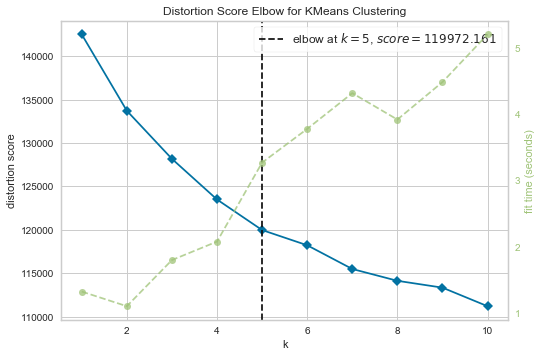

In [264]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans


kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1,11))

visualizer.fit(df_cluster)
visualizer.show()

In [265]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(df_cluster)


KMeans(n_clusters=5, random_state=0)

In [268]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(df_cluster)
pca.explained_variance_ratio_

array([0.07965379, 0.06363941])

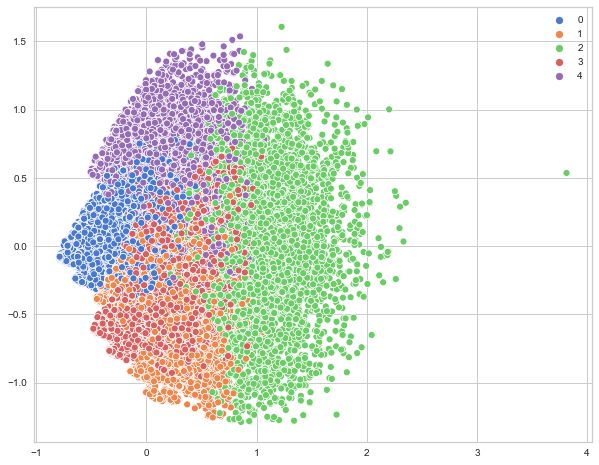

In [269]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans.labels_, 
                palette=sns.color_palette('muted', n_colors=5))

In [271]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(df_cluster)

clusters = kmeans.predict(df_cluster, sample_weight=None)

In [273]:
# Create new column which assigns each row to a cluster
df_cluster['Clusters'] = pd.Series(clusters, index=df_cluster.index)


In [275]:
# Put back the Basket_IDs
df1 = pd.read_excel(r"C:\Users\Pigi\Desktop\Clustering final.xlsx",  sheet_name='Cluster input (1)')
basketids = df1['Basket id'].tolist()
df_cluster['Basket_ID'] = pd.Series(basketids, index=df_cluster.index)


### Seperating the clusters
Here we are seperating the Clusters in order to get a clearer idea of what is included in each one.

#### Cluster 1

In [278]:
cluster_0 = df_cluster[df_cluster['Clusters'] == 0] 
data_0 = []
for i in df_cluster.columns:
    data_0.append([i,cluster_0[i].sum(axis = 0),])

df0 = pd.DataFrame(data_0, columns = ['Name', 'Sum']) 

  

In [280]:
# Sort by units purchased from each category to determine popularity
df0.drop(df0.tail(5).index, 
        inplace = True) 
df0.sort_values(by = 'Sum', ascending = False, inplace = True)
df0.drop(df0[df0['Sum'] == 0].index, inplace = True)

####  Note  
Below we can see that most of the products included in this cluster are processed and can be regarded as 'Unhealthy'.

In [357]:
df0.head(10)

,Name,Sum
24,ΓΛΥΚΑ/ΣΝΑΚΣ,2679
12,ΑΡΤΟΣΚΕΥΑΣΜΑΤΑ,2151
64,ΠΡΟΙΟΝΤΑ ΓΙΑ ΖΑΧΑΡΟΠ/ΤΙΚΗ,1903
71,ΤΥΡΙΑ,1503
70,ΤΣΙΠΣ/ΣΝΑΚΣ,1387
48,ΚΑΦΕΣ/ΤΣΑΙ/ΡΟΦΗΜΑΤΑ,1270
32,ΕΙΔΗ ΥΓΙΕΙΝΗΣ/ΚΑΛΛΥΝΤΙΚΑ,1241
50,ΚΟΝΣΕΡΒΕΣ,1061
42,ΖΥΜΑΡΙΚΑ/ΡΥΖΙ/ΠΟΥΡΕΣ,1042
74,ΦΡΕΣΚΑ ΦΡΟΥΤΑ,1020


#### Cluster 2

In [359]:
cluster_1 = df_cluster[df_cluster['Clusters'] == 1]
cluster_1
data_1 = []
for i in df_cluster.columns:
    data_1.append([i,cluster_1[i].sum(axis = 0)])
    data_1


df1 = pd.DataFrame(data_1, columns = ['Name', 'Sum']) 

df1.drop(df1.tail(2).index, 
        inplace = True) 
  
df1.sort_values(by = 'Sum', ascending = False, inplace = True)

df1.drop(df1[df1['Sum'] == 0].index, inplace = True)

#### Note 
blahblahblah

In [360]:
df1.head(10)

,Name,Sum
82,Basket_ID,8.260873e+12
83,SSUnitts,5.054600e+04
20,ΓΑΛΑ,7.515000e+03
81,Clusters,7.515000e+03
73,ΦΡΕΣΚΑ ΛΑΧΑΝΙΚΑ,1.954000e+03
78,ΧΥΜΟΙ/ΑΝΑΨΥΚΤΙΚΑ,1.618000e+03
24,ΓΛΥΚΑ/ΣΝΑΚΣ,1.475000e+03
12,ΑΡΤΟΣΚΕΥΑΣΜΑΤΑ,1.270000e+03
74,ΦΡΕΣΚΑ ΦΡΟΥΤΑ,1.100000e+03
64,ΠΡΟΙΟΝΤΑ ΓΙΑ ΖΑΧΑΡΟΠ/ΤΙΚΗ,1.097000e+03


#### Cluster 3

In [361]:
cluster_2 = df_cluster[df_cluster['Clusters'] == 2]
cluster_2.drop(cluster_2.tail(1).index, 
        inplace = True)
data_2 = []
for i in df_cluster.columns:
    data_2.append([i,cluster_2[i].sum(axis = 0)])


df2 = pd.DataFrame(data_2, columns = ['Name', 'Sum']) 


df2.drop(df2.tail(2).index, 
        inplace = True) 
  
df2.sort_values(by = 'Sum', ascending = False, inplace = True)

df2.drop(df2[df2['Sum'] == 0].index, inplace = True)


C:\Users\Pigi\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [362]:
df2.head(10)

,Name,Sum
82,Basket_ID,5.501354e+12
83,SSUnitts,6.947800e+04
81,Clusters,1.001000e+04
71,ΤΥΡΙΑ,4.303000e+03
12,ΑΡΤΟΣΚΕΥΑΣΜΑΤΑ,3.463000e+03
20,ΓΑΛΑ,2.716000e+03
10,ΑΠΟΡΡΥΠΑΝΤΙΚΑ/ΚΑΘΑΡΙΣΤΙΚΑ,2.446000e+03
78,ΧΥΜΟΙ/ΑΝΑΨΥΚΤΙΚΑ,2.332000e+03
5,ΑΛΛΑΝΤΙΚΑ,2.285000e+03
73,ΦΡΕΣΚΑ ΛΑΧΑΝΙΚΑ,2.273000e+03


#### Cluster 4

In [363]:
cluster_3 = df_cluster[df_cluster['Clusters'] == 3]
data_3 = []
for i in df_cluster.columns:
    data_3.append([i,cluster_3[i].sum(axis = 0)])


df3 = pd.DataFrame(data_3, columns = ['Name', 'Sum']) 

df3.drop(df3.tail(2).index, 
        inplace = True) 
  
df3.sort_values(by = 'Sum', ascending = False, inplace = True)

df3.drop(df3[df3['Sum'] == 0].index, inplace = True)



In [364]:
df3.head(10)

,Name,Sum
82,Basket_ID,7.540421e+12
83,SSUnitts,5.096400e+04
81,Clusters,2.056500e+04
73,ΦΡΕΣΚΑ ΛΑΧΑΝΙΚΑ,6.855000e+03
10,ΑΠΟΡΡΥΠΑΝΤΙΚΑ/ΚΑΘΑΡΙΣΤΙΚΑ,1.685000e+03
74,ΦΡΕΣΚΑ ΦΡΟΥΤΑ,1.460000e+03
78,ΧΥΜΟΙ/ΑΝΑΨΥΚΤΙΚΑ,1.428000e+03
12,ΑΡΤΟΣΚΕΥΑΣΜΑΤΑ,1.271000e+03
71,ΤΥΡΙΑ,1.076000e+03
50,ΚΟΝΣΕΡΒΕΣ,1.027000e+03


#### Cluster 5

In [294]:
cluster_4 = df_cluster[df_cluster['Clusters'] == 4]
data_4 = []
for i in df_cluster.columns:
    data_4.append([i,cluster_4[i].sum(axis = 0)])


df4 = pd.DataFrame(data_4, columns = ['Name', 'Sum']) 


df4.drop(df4.tail(2).index, 
        inplace = True) 
  
df4.sort_values(by = 'Sum', ascending = False, inplace = True)

df4.drop(df4[df4['Sum'] == 0].index, inplace = True)

#### Note
blablha

In [365]:
df4.head(10)

,Name,Sum
10,ΑΠΟΡΡΥΠΑΝΤΙΚΑ/ΚΑΘΑΡΙΣΤΙΚΑ,7685
20,ΓΑΛΑ,2260
78,ΧΥΜΟΙ/ΑΝΑΨΥΚΤΙΚΑ,1814
24,ΓΛΥΚΑ/ΣΝΑΚΣ,1597
32,ΕΙΔΗ ΥΓΙΕΙΝΗΣ/ΚΑΛΛΥΝΤΙΚΑ,1528
64,ΠΡΟΙΟΝΤΑ ΓΙΑ ΖΑΧΑΡΟΠ/ΤΙΚΗ,1232
12,ΑΡΤΟΣΚΕΥΑΣΜΑΤΑ,1197
48,ΚΑΦΕΣ/ΤΣΑΙ/ΡΟΦΗΜΑΤΑ,1070
67,ΣΚΕΥΗ/ΠΙΑΤΙΚΑ,939
42,ΖΥΜΑΡΙΚΑ/ΡΥΖΙ/ΠΟΥΡΕΣ,787


In [295]:
#Import dataframe including Sum of Sum_Units and Sum of Sum_Values per Basket
df_ss = pd.read_excel(r"C:\Users\Pigi\Desktop\Clustering final.xlsx",  sheet_name='SS')


In [297]:
# Merge with the dataframe that was used as input for Clustering
df_ss.drop(df_ss.tail(1).index, 
        inplace = True) 
df_cluster = pd.merge(df_cluster,
               df_ss[['Basket_ID','SSUnitts','SSValue','BarVar']], 
               on='Basket_ID', 
               how='inner')



### Finding the average value of the Baskets included in each Cluster
Below we are calculating the average amount of money spent in each Cluster.

#### Average Value of Cluster 1

In [301]:
# Average value of the 1st Cluster
cluster_0 = df_cluster[df_cluster['Clusters'] == 0] 
len_0 = cluster_0.shape[0]
var_0= cluster_0.BarVar.sum(axis = 0)
avg_0 = var_0/len_0
avg_0


3.4809760796275486

#### Average value of the Cluster 2


In [305]:
cluster_1 = df_cluster[df_cluster['Clusters'] == 1] 
len_1 = cluster_1.shape[0]
var_1= cluster_1.BarVar.sum(axis = 0)
avg_1 = var_1/len_1
avg_1


4.9284098469727216

#### Average value of the Cluster 3

In [306]:
cluster_2 = df_cluster[df_cluster['Clusters'] == 2] 
len_2 = cluster_2.shape[0]
var_2= cluster_2.BarVar.sum(axis = 0)
avg_2 = var_2/len_2
avg_2


11.634838194167

#### Average value of the Cluster 4

In [307]:
# Average value of the 4th Cluster
cluster_3 = df_cluster[df_cluster['Clusters'] == 3] 
len_3 = cluster_3.shape[0]
var_3= cluster_3.BarVar.sum(axis = 0)
avg_3 = var_3/len_3
avg_3


6.140481400437637

#### Average value of the Cluster 5

In [308]:
# Average value of the 5th Cluster
cluster_4 = df_cluster[df_cluster['Clusters'] == 4] 
len_4 = cluster_4.shape[0]
var_4= cluster_4.BarVar.sum(axis = 0)
avg_4 = var_4/len_4
avg_4


5.922446324007807

## Clustering Customers
First we are going to use the KMeans algorithm to create different clusters that give as an idea about which types of 'Customer' visit this specific Super Market and about how we can put them into groups.


In [310]:
df_cust = pd.read_excel(r"C:\Users\Pigi\Desktop\Clustering final.xlsx",  sheet_name = 'Customer Cluster')

In [311]:
df_cust = df_cust.iloc[:,1:]


#### Missing Values
We dropped all rows from the 'Sex' variable that included missing values.

In [313]:
# Drop all rows with a missing value on the variable of 'Sex'
df_cust.drop(df_cust[df_cust['Sex'].isna()].index, inplace = True) 


### Descriptive Statistics
We needed to check if the variation of the variables is quite similar. The result didn't show such thing, so we standardized the data using a standard scaler.

In [314]:
df_cust.describe()

,cluster0,cluster1,cluster2,cluster3,cluster4,Frequencies,Value,Sex
count,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000
mean,1.851971,1.539019,1.788415,1.626441,1.876643,34.157683,79.184379,0.719228
std,1.400901,1.130034,1.288158,1.188806,1.367273,42.730200,94.191446,0.546406
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.649450,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,18.838474,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,43.989435,1.000000
75%,2.000000,1.000000,2.000000,2.000000,2.000000,45.000000,105.528775,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,444.000000,957.042497,2.000000


In [367]:
#Standardise the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_cust)
X = scaler.transform(df_cust)
scaled_df = pd.DataFrame(X, index=df_cust.index, columns=df_cust.columns)


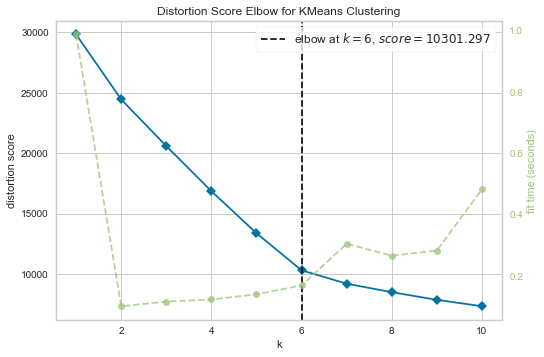

In [316]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans


kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1,11))

visualizer.fit(scaled_df)
visualizer.show()

In [317]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(scaled_df)


KMeans(n_clusters=6, random_state=0)

In [318]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(scaled_df)
pca.explained_variance_ratio_

array([0.26616144, 0.16264892])

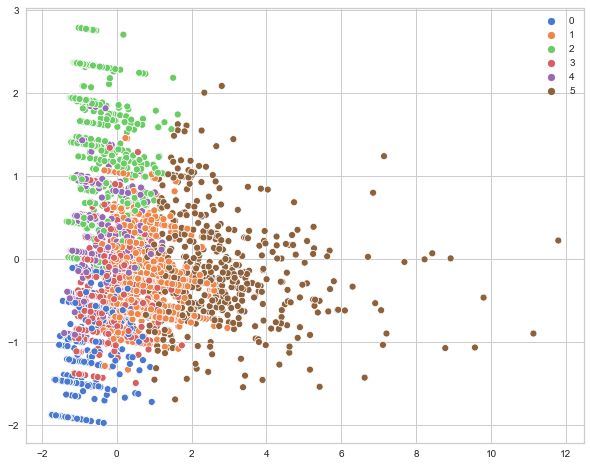

In [324]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans.labels_, 
                palette=sns.color_palette('muted', n_colors=6))

In [325]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(scaled_df)

clusters = kmeans.predict(scaled_df, sample_weight=None)

In [326]:
df = pd.read_excel(r"C:\Users\Pigi\Desktop\Clustering final.xlsx",  sheet_name = 'Customer Cluster')

In [327]:
df.drop(df[df['Sex'].isna()].index, inplace = True) 

df['Clusters'] = pd.Series(clusters, index=df.index)


In [331]:
# Define the Clusters for Customers
cluster_0 = df[df['Clusters'] == 0] 
cluster_1 = df[df['Clusters'] == 1] 
cluster_2 = df[df['Clusters'] == 2] 
cluster_3 = df[df['Clusters'] == 3] 
cluster_4 = df[df['Clusters'] == 4] 
cluster_5 = df[df['Clusters'] == 5] 



### Percentage of Males & Females
Here we are viewing in what ratio are Men and Women distributed in this specific dataset. This will give us some further insides about the Clusters.

In [332]:
# Percentage of females in the 1st Cluster
cluster_0['Gender'].value_counts()
fem0 = 385 / (cluster_0.shape[0] -25) * 100


In [333]:
# Percentage of females in the 2nd Cluster
cluster_1['Gender'].value_counts()
fem1 = 528 / (cluster_1.shape[0] -35) * 100
fem1

69.01960784313725

In [334]:
# Percentage of females in the 3rd Cluster
cluster_2['Gender'].value_counts()
fem2 = 485 / (cluster_2.shape[0] -33) * 100



In [335]:
# Percentage of females in the 4th Cluster
cluster_3['Gender'].value_counts()
fem3 = 359 / (cluster_3.shape[0] -25) * 100


In [336]:
# Percentage of females in the 5th Cluster
cluster_4['Gender'].value_counts()
fem4 = 270 / (cluster_4.shape[0] -42) * 100


In [337]:
# Percentage of females in the 6th Cluster
cluster_5['Gender'].value_counts()
fem5 = 294 / (cluster_5.shape[0] -20) * 100


## Analysis of the data for the Holidays
We are going to compare some percentages regarding the most and least frequeantly used Super Market items during the seasons of 'Easter', 'Clean Monday' and the '25th of March'.

### Easter

In [339]:
df1 = pd.read_excel(r"C:\Users\Pigi\Desktop\ThirdPramatari.xlsx",  sheet_name='Easter')
df = pd.read_excel(r"C:\Users\Pigi\Desktop\Clustering final.xlsx",  sheet_name='POS_DATA cleansed')


In [340]:
# Define the dates in which Easter occured
df.drop(df[df['Date'].isin(['2013-04-29','2013-04-30','2013-05-01','2013-05-02'])].index, inplace = True) 


#### Differences in the consumption of Meat & Cold Cuts

In [356]:
# View difference in the Average Amount spent daily for Cold cuts & Meat during Easter and during the rest of the year
meat_perc_east = df1[df1['Product B'].isin(['ΑΛΛΑΝΤΙΚΑ', 'ΚΡΕΟΠΩΛΕΙΟ'])]['Sum_Value'].sum(axis = 0) / df1.shape[0] * 100
meat_perc = df[df['Product B'].isin(['ΑΛΛΑΝΤΙΚΑ', 'ΚΡΕΟΠΩΛΕΙΟ'])]['Sum_Value'].sum(axis = 0) / df.shape[0] * 100
meat_perc_east - meat_perc

14.174847809143497

#### Differences in the consumption of Fruits & Vegetables

In [352]:
veg_perc_east = df1[df1['Product B'].isin(['ΦΡΟΥΤΑ & ΛΑΧΑΝΙΚΑ'])]['Sum_Value'].sum(axis = 0)/df1.shape[0] * 100
veg_perc = df[df['Product B'].isin(['ΦΡΟΥΤΑ & ΛΑΧΑΝΙΚΑ'])]['Sum_Value'].sum(axis = 0) / df.shape[0] * 100
veg_perc_east - veg_perc 

4.3492074712068

#### Differences in the consumption of Dairy

In [355]:
dairy_perc_east = df1[df1['Product B'].isin(['ΓΑΛΑΚΤΟΚΟΜΙΚΑ'])]['Sum_Value'].sum(axis = 0)/df1.shape[0] * 100
dairy_perc = df[df['Product B'].isin(['ΓΑΛΑΚΤΟΚΟΜΙΚΑ'])]['Sum_Value'].sum(axis = 0)/df.shape[0] * 100
dairy_perc_east - dairy_perc 

-4.5488526070340995